In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
Mouse_df = pd.read_csv("mouse_drug_data.csv")
Clinical_df = pd.read_csv("clinicaltrial_data.csv")

# Combine the data into a single dataset
combined_drugs_data = pd.merge(Mouse_df , Clinical_df, on ="Drug")

# Display the data table for preview
combined_drugs_data.head()


,Mouse ID_x,Drug,Mouse ID_y,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,f234,0,45.0,0
1,f234,Stelasyn,x402,0,45.0,0
2,f234,Stelasyn,a492,0,45.0,0
3,f234,Stelasyn,w540,0,45.0,0
4,f234,Stelasyn,v764,0,45.0,0


## Tumor Response to Treatment

In [3]:
# # Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Mean_Tumor_Volume = combined_drugs_data.mean()
# # Convert to DataFrame
# Mean_Tumor_Volume = combined_drugs_data.groupby(["Drug", "Timepoint"]).mean()
# # Preview DataFrame
# print(Mean_Tumor_Volume.head())
Group_data = combined_drugs_data.groupby(["Drug", "Timepoint"])
Mean_Tumor_Data = Group_data["Tumor Volume (mm3)"].mean()
Mean_Tumor_Data
Tumor_response_data = pd.DataFrame(Mean_Tumor_Data).reset_index()
Tumor_response_data.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# # Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

# St_Error_Mean = combined_drugs_data.sem()

# # Convert to DataFrame
# St_Error_Mean = combined_drugs_data.groupby(["Drug", "Timepoint"]).sem()

# # Preview DataFrame
# print(St_Error_Mean.head())
Mean_Tumor_Data_error = Group_data["Tumor Volume (mm3)"].sem()
Tumor_response_data_error = pd.DataFrame(Mean_Tumor_Data_error).reset_index()
Tumor_response_data_error.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.087976
2,Capomulin,10,0.137808
3,Capomulin,15,0.164329
4,Capomulin,20,0.178102


In [5]:
# # Minor Data Munging to Re-Format the Data Frames
pivot_sem_pivot_df = St_Error_Mean.reset_index().pivot_table(index='Timepoint', columns='Drug', values = 'Metastatic Sites')
# # Preview that Reformatting worked
pivot_sem_pivot_df.head()                                               

NameError: name 'St_Error_Mean' is not defined

In [6]:
# Generate the Plot (with Error Bars)
# users = [0, 5, 10, 15, 20]
# x_axis = np.arange(len("Drugs"))
# # Save the Figure
# plt.bar(x_axis, users, color = 'blue', alpha = 0.5, align = "center")
# plt.savefig("../Pymaceuticals/Bar_graph.png")
Capomulin_error = Tumor_response_data_error.loc[Tumor_response_data_error["Drug"] == "Capomulin", "Tumor Volume (mm3)"]
Infubinol_error = Tumor_response_data_error.loc[Tumor_response_data_error["Drug"] == "Infubinol", "Tumor Volume (mm3)"]
Ketapril_error = Tumor_response_data_error.loc[Tumor_response_data_error["Drug"] == "Ketapril", "Tumor Volume (mm3)"]
Placebo_error = Tumor_response_data_error.loc[Tumor_response_data_error["Drug"] == "Placebo", "Tumor Volume (mm3)"]
Time = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
plt.errorbar(Time, pivot_sem_pivot_df["Capomulin"] , yerr= Capomulin_error, label= "Capomulin", marker= "o", color="red", linestyle='--')
plt.errorbar(Time, pivot_sem_pivot_df["Infubinol"] , yerr= Infubinol_error, label= "Infubinol", marker= "^", color="blue", linestyle='--')
plt.errorbar(Time, pivot_sem_pivot_df["Ketapril"] , yerr= Ketapril_error, label= "Ketapril", marker= "D", color="black", linestyle='--')
plt.errorbar(Time, pivot_sem_pivot_df["Placebo"] , yerr= Placebo_error , label= "Placebo", marker= "s", color="green", linestyle='--')
plt.legend()
plt.title("Tumor Response to Treatment ")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()

plt.savefig("../Pymaceuticals/Bar_graph.png")
plt.show()

NameError: name 'pivot_sem_pivot_df' is not defined

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Mean_Met_Site = combined_drugs_data["Metastatic Sites"].mean()
# Convert to DataFrame
Mean_Met_Site = combined_drugs_data.groupby(["Drug", "Timepoint"]).mean()
# Preview DataFrame
print(Mean_Met_Site.head())


                     Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
SEM_Mean_Met_Site = combined_drugs_data["Metastatic Sites"].sem()
# Convert to DataFrame
SEM_Mean_Met_Site = combined_drugs_data.groupby(["Drug", "Timepoint"]).sem()
# Preview DataFrame
print(SEM_Mean_Met_Site.head())

                     Metastatic Sites  Mouse ID_x  Mouse ID_y  \
Drug      Timepoint                                             
Capomulin 0                  0.000000         NaN         NaN   
          5                  0.014676         NaN         NaN   
          10                 0.024599         NaN         NaN   
          15                 0.025875         NaN         NaN   
          20                 0.031641         NaN         NaN   

                     Tumor Volume (mm3)  
Drug      Timepoint                      
Capomulin 0                    0.000000  
          5                    0.087976  
          10                   0.137808  
          15                   0.164329  
          20                   0.178102  


In [9]:
# Minor Data Munging to Re-Format the Data Frames
pivot_sem_met_df = SEM_Mean_Met_Site.reset_index().pivot_table(index='Timepoint', columns='Drug', values = 'Metastatic Sites')
# Preview that Reformatting worked
pivot_sem_met_df.head()   

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.014676,0.021214,0.017974,0.019205,0.018328,0.019781,0.019880,0.013009,0.017097,0.015227
10,0.024599,0.029695,0.031134,0.027776,0.031957,0.022586,0.021214,0.017692,0.024212,0.021339
15,0.025875,0.035199,0.037904,0.037295,0.030995,0.037118,0.028006,0.022586,0.030039,0.021818
20,0.031641,0.046901,0.045817,0.046122,0.035461,0.045612,0.037763,0.023381,0.039250,0.032320


In [10]:
# Generate the Plot (with Error Bars)
Capomulin_error = pivot_sem_met_df.loc[pivot_sem_met_df == "Capomulin", "Tumor Volume (mm3)"]
Infubinol_error = pivot_sem_met_df.loc[pivot_sem_met_df == "Infubinol", "Tumor Volume (mm3)"]
Ketapril_error = pivot_sem_met_df.loc[pivot_sem_met_df == "Ketapril", "Tumor Volume (mm3)"]
Placebo_error = pivot_sem_met_df.loc[pivot_sem_met_df == "Placebo", "Tumor Volume (mm3)"]
Time = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
plt.errorbar(Time,pivot_sem_met_df["Capomulin"] , yerr= Capomulin_error, label= "Capomulin")
plt.errorbar(Time, pivot_sem_met_df["Infubinol"] , yerr= Infubinol_error, label= "Infubinol")
plt.errorbar(Time, pivot_sem_met_df["Ketapril"] , yerr= Ketapril_error, label= "Ketapril")
plt.errorbar(Time, pivot_sem_met_df["Placebo"] , yerr= Placebo_error, label= "Placebo")
plt.legend()
plt.title("Metastatic spread During Treatment ")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met.Sites")
plt.grid()
# Save the Figure

# Show the Figure

KeyError: 'Tumor Volume (mm3)'

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
Mice_Count = combined_drugs_data["Mouse ID_y"].count()

# Convert to DataFrame
Mice_Count = combined_drugs_data.groupby(["Drug", "Timepoint"]).count()
# Preview DataFrame
Mice_Count.head()

Mouse ID_x  Mouse ID_y  Tumor Volume (mm3)  \
Drug      Timepoint                                               
Capomulin 0                 625         625                 625   
          5                 625         625                 625   
          10                625         625                 625   
          15                600         600                 600   
          20                575         575                 575   

                     Metastatic Sites  
Drug      Timepoint                    
Capomulin 0                       625  
          5                       625  
          10                      625  
          15                      600  
          20                      575

In [12]:
# Minor Data Munging to Re-Format the Data Frames
pivot_Mice_Count = Mice_Count.reset_index().pivot_table(index='Timepoint', columns='Drug', values = 'Mouse ID_y')
# Preview the Data Frame
pivot_Mice_Count.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,625,625,625,625,625,625,600,625,650,625
5,625,525,625,575,575,600,575,625,625,600
10,625,500,525,550,525,600,525,600,575,550
15,600,475,525,475,525,500,375,600,575,525
20,575,450,500,475,500,475,375,575,525,425


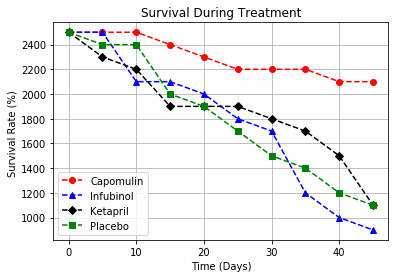

In [13]:
# Generate the Plot (Accounting for percentages)
Time = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
plt.plot(Time, (pivot_Mice_Count["Capomulin"]/25)*100 , label= "Capomulin", marker= "o", color="red", linestyle='--')
plt.plot(Time, (pivot_Mice_Count["Infubinol"]/25)*100 , label= "Infubinol", marker= "^", color="blue", linestyle='--')
plt.plot(Time, (pivot_Mice_Count["Ketapril"]/25)*100 , label= "Ketapril", marker= "D", color="black", linestyle='--')
plt.plot(Time, (pivot_Mice_Count["Placebo"]/25)*100 , label= "Placebo", marker= "s", color="green", linestyle='--')
plt.legend()
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%) ")
plt.grid()
# Save the Figure
plt.savefig("../Pymaceuticals/Mouse_survival.png")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug
Intial_tumor_volume = 45
Drug_change = ((pivot_Mice_Count.loc[45, :] - Intial_tumor_volume)/Intial_tumor_volume)*100
# Display the data to confirm
Drug_change

Drug
Capomulin    1066.666667
Ceftamin      622.222222
Infubinol     400.000000
Ketapril      511.111111
Naftisol      622.222222
Placebo       511.111111
Propriva      288.888889
Ramicane     1011.111111
Stelasyn      511.111111
Zoniferol     677.777778
Name: 45, dtype: float64

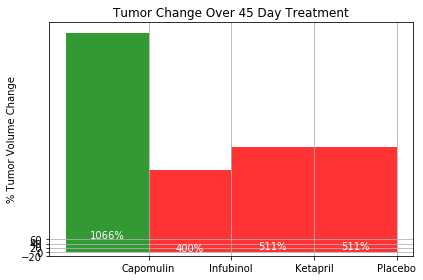

In [15]:
# Store all Relevant Percent Changes into a Tuple
tuple_Percent_Change = tuple(zip(Drug_change.index, Drug_change))
tuple_Percent_Change_list = list(tuple_Percent_Change)
tuple_Percent_Change_list
# Splice the data between passing and failing drugs
passing_drugs_list = []
failing_drugs_list = []
index_passing_drugs_list = []
index_failing_drugs_list = []
for j,elements in tuple_Percent_Change_list :
    if elements > 0 :
        passing_drug = elements
        passing_drugs_list.append(elements)
        index_passing_drugs_list.append(j)
    else :
        failing_drugs = elements
        failing_drugs_list.append(elements)
        index_failing_drugs_list.append(j)
passing_drugs = list(zip(index_passing_drugs_list, passing_drugs_list))
failing_drugs = list(zip(index_failing_drugs_list, failing_drugs_list))
# Orient widths. Add labels, tick marks, etc. 
fig, ax = plt.subplots()
y_value1 = [Drug_change["Infubinol"], Drug_change["Ketapril"], Drug_change["Placebo"]]
x_axis1 = [0]
x_axis2 = [1, 2, 3]
bars1 = ax.bar(x_axis1, Drug_change["Capomulin"], color='g', alpha=0.8, align="edge", width = -1)
bars2 = ax.bar(x_axis2, y_value1 , color='r', alpha=0.8, align="edge", width = -1)
x_labels = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]

plt.setp(ax, xticks=[0, 1, 2, 3], xticklabels=["Capomulin", "Infubinol", "Ketapril", "Placebo"],
        yticks=[-20, 0, 20, 40, 60])
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.grid()

# Use functions to label the percentages of changes
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, .1*height, "%d" %int(height)+ "%",
                ha='center', va='top', color="white")

# Call functions to implement the function calls
autolabel(bars1)
autolabel(bars2)
fig.tight_layout()

# Save the Figure
plt.savefig("DruggedMouse.png")

# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)